___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

# Neural Networks in Sklearn

In [3]:
from sklearn.datasets import load_iris, load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Iris dataset
In this section, we'll use the Iris dataset to make out first example.

So, load and split data:

In [4]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)

Prepare a multi-layer perceptron classifier (MLPClassifier), train and get the score over the test data

(https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [5]:
clf = MLPClassifier(
    # verbose=True  # uncomment to see loss function evolution
    random_state=1
).fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/pcardoso/anaconda3/envs/AprendizagemAutomatica/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8947368421052632

ok...!? let us see if we can improve this... The used parameters were:

In [6]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

What if the maximum number of iterations (epochs) is increased?

In [7]:
clf = MLPClassifier(
    max_iter=1000,
    random_state=1
    # verbose=True  # uncomment to see loss function evolution
).fit(X_train, y_train)

clf.score(X_test, y_test)

1.0

That is good! Maybe there were other alternatives, like using more layers...?

In [9]:
clf = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    random_state=1,
    max_iter=1000,
    # verbose=True
).fit(X_train, y_train)

clf.score(X_test, y_test)

1.0

The probabilities associated to each test instance are 

In [10]:
clf.predict_proba(X_test)

array([[9.99977670e-01, 2.23300648e-05, 1.14731775e-12],
       [1.98956861e-02, 9.79957823e-01, 1.46490654e-04],
       [1.30671593e-04, 9.99606803e-01, 2.62525363e-04],
       [9.99947954e-01, 5.20456751e-05, 1.00789476e-11],
       [1.16690239e-06, 7.26287609e-02, 9.27370072e-01],
       [2.40900080e-04, 9.89332609e-01, 1.04264913e-02],
       [2.42611004e-06, 2.06088731e-02, 9.79388701e-01],
       [9.99609767e-01, 3.90232551e-04, 1.54365975e-10],
       [9.99195075e-01, 8.04924676e-04, 5.57143123e-10],
       [4.51908145e-08, 5.80005239e-04, 9.99419950e-01],
       [3.37350019e-04, 9.94578001e-01, 5.08464864e-03],
       [9.99855213e-01, 1.44787366e-04, 2.90778563e-11],
       [3.59169775e-08, 1.09643639e-03, 9.98903528e-01],
       [2.10016310e-04, 9.98713929e-01, 1.07605461e-03],
       [2.31323653e-04, 9.76361933e-01, 2.34067435e-02],
       [9.99618878e-01, 3.81121384e-04, 4.46453745e-10],
       [2.73978384e-04, 9.99344648e-01, 3.81373427e-04],
       [4.30112552e-04, 9.34425

(array([[25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.],
        [22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.],
        [27.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]]),
 array([1.14731775e-12, 9.99977670e-02, 1.99995534e-01, 2.99993301e-01,
        3.99991068e-01, 4.99988835e-01, 5.99986602e-01, 6.99984369e-01,
        7.99982136e-01, 8.99979903e-01, 9.99977670e-01]),
 <a list of 3 BarContainer objects>)

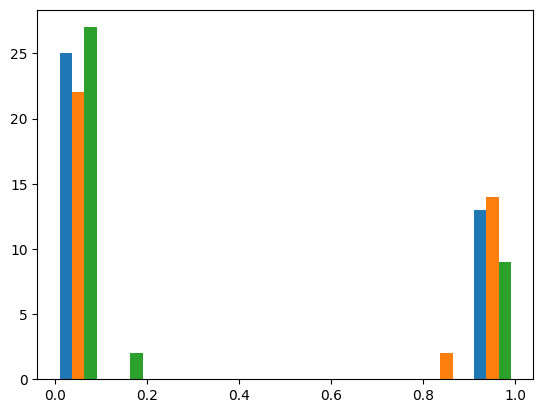

In [11]:
plt.hist(clf.predict_proba(X_test))

## Digits dataset

Let us do a similar analysis using the digits dataset

In [12]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1)

With default parameters the results are the following

In [13]:
clf = MLPClassifier(random_state=1).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9755555555555555

Not bad! Can it be improved?

In [14]:
clf = MLPClassifier(
    max_iter=1000,
    hidden_layer_sizes=(100, 100),
    random_state=1
).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9866666666666667

It was not worst but there isn't much space to improve. Another try...?

In [15]:
clf = MLPClassifier(
    max_iter=1000,
    tol=1e-10,
    hidden_layer_sizes=(1000),
    random_state=1
).fit(X_train, y_train)

clf.score(X_test, y_test)

/Users/pcardoso/anaconda3/envs/AprendizagemAutomatica/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9844444444444445

And again...!? Since it did not converge, let us increase the maximum iterations number

In [16]:
clf = MLPClassifier(
    max_iter=10000,
    tol=1e-10,
    hidden_layer_sizes=(1000,),
    random_state=1,
    activation='tanh',
).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9911111111111112